<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Алгоритмы кластеризации (практика)</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

# Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

* Подготовте данные к кластеризации и сделайте иерарническую кластеризацию этого набора данных.
* Изобразите дендрограмму
* Выверите число кластеров и интерпретируйте их

Почему перед применением кластеризации признки необходимо нормализовать?

In [2]:
df = pd.read_csv('data/food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [4]:
X = df.iloc[:, 1:].values

In [7]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [8]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

In [ ]:
# Сначала linkage (используйте average linkage)
# Посмотрите на dendrogram
# Вытащим кластеры с помощью fcluster

In [9]:
Z = linkage(X, method='average', metric='euclidean')

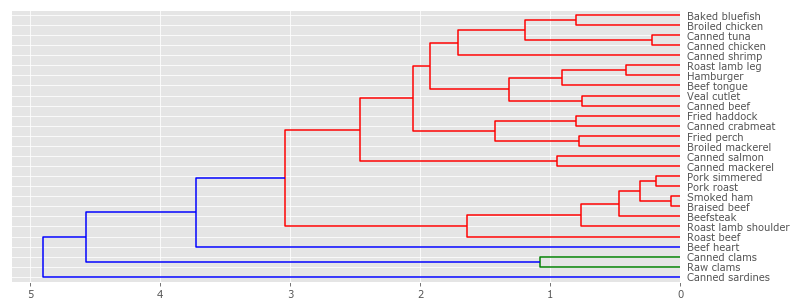

In [14]:
names = df.Name.values
dend = dendrogram(Z, labels=names, orientation='left')

In [15]:
labels = fcluster(Z, 5, criterion='maxclust') # выделили 5 кластеров по
# дендрограмме

In [19]:
labels[:10]

array([2, 3, 2, 2, 3, 3, 3, 4, 3, 2], dtype=int32)

In [20]:
labels = fcluster(Z, 3, criterion='distance') # выделили кластеры по порогу 3

In [22]:
df.loc[:, 'label'] = labels

In [23]:
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron,label
0,Braised beef,340,20,28,9,2.6,2
1,Hamburger,245,21,17,9,2.7,3
2,Roast beef,420,15,39,7,2.0,2
3,Beefsteak,375,19,32,9,2.6,2
4,Canned beef,180,22,10,17,3.7,3


In [25]:
df = df.set_index('Name')

In [26]:
df.groupby('label').agg('mean')

,Energy,Protein,Fat,Calcium,Iron
label,,,,,
1,57.500000,9.000000,1.000000,78.000000,5.700000
2,352.857143,18.571429,30.142857,8.714286,2.414286
3,167.187500,19.812500,8.562500,36.812500,1.725000
4,160.000000,26.000000,5.000000,14.000000,5.900000
5,180.000000,22.000000,9.000000,367.000000,2.500000


In [27]:
for c, group in df.groupby('label'):
    print('Cluter {}'.format(c))
    print(group)
    print('='*10 + '\n')

Cluter 1
              Energy  Protein  Fat  Calcium  Iron  label
Name                                                    
Raw clams         70       11    1       82   6.0      1
Canned clams      45        7    1       74   5.4      1

Cluter 2
                     Energy  Protein  Fat  Calcium  Iron  label
Name                                                           
Braised beef            340       20   28        9   2.6      2
Roast beef              420       15   39        7   2.0      2
Beefsteak               375       19   32        9   2.6      2
Roast lamb shoulder     300       18   25        9   2.3      2
Smoked ham              340       20   28        9   2.5      2
Pork roast              340       19   29        9   2.5      2
Pork simmered           355       19   30        9   2.4      2

Cluter 3
                  Energy  Protein  Fat  Calcium  Iron  label
Name                                                        
Hamburger            245       21   17       

# Применение K-means

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.

In [29]:
df_sns = pd.read_csv('data/snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

#### Задание

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)

In [30]:
df_sns.shape

(30000, 40)

In [31]:
from sklearn.cluster import KMeans

In [34]:
X = df_sns.iloc[:, 4:].values

In [35]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [36]:
kmeans = KMeans(n_clusters=9, random_state=123)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [37]:
labels = kmeans.labels_

In [38]:
df_sns.loc[:, 'label'] = labels

In [41]:
df_sns.label.value_counts()

4    20024
0     5036
1     1337
6      846
8      841
2      752
3      697
7      466
5        1
Name: label, dtype: int64

In [45]:
for c, group in df_sns.groupby('label'):
    print('Cluster: {}'.format(c))
    print(group.iloc[:, 4:-1].mean().nlargest(5))
    print('=' * 10 + '\n')

Cluster: 0
music         1.066521
dance         1.051033
shopping      0.890191
cute          0.828435
basketball    0.722597
dtype: float64

Cluster: 1
drunk    1.409873
music    0.707554
hair     0.629020
god      0.522064
dance    0.439043
dtype: float64

Cluster: 2
band        4.105053
marching    1.418883
music       1.215426
god         0.505319
dance       0.464096
dtype: float64

Cluster: 3
soccer      4.901004
music       0.773314
shopping    0.499283
god         0.469154
hair        0.440459
dtype: float64

Cluster: 4
music       0.554035
god         0.311626
dance       0.230423
hair        0.192419
shopping    0.181632
dtype: float64

Cluster: 5
blonde    327.0
sex        22.0
hair       12.0
god        10.0
die         6.0
dtype: float64

Cluster: 6
hair      3.475177
sex       2.760047
music     2.374704
kissed    1.874704
die       1.269504
dtype: float64

Cluster: 7
god       4.725322
church    2.180258
jesus     2.049356
music     1.066524
bible     0.972103
dtype: flo

In [39]:
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,6


# Геоданные

In [23]:
import mpl_toolkits.basemap as bm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Загрузите геоданные из `geo_data.txt` (lat, lon).

Будем пытаться кластеризовать данные с помощью DBSCAN и меры [haversine](https://en.wikipedia.org/wiki/Haversine_formula)

In [106]:
df_geo = pd.read_csv('data/geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

In [107]:
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [15]:
def plot_geo(lat, lon, labels=None):    
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print 'что-то пошло не так'
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

Для начала нарисуем все точки на карте

In [ ]:
plot_geo(df_geo.lat.values, df_geo.lon.values, labels=None)

Мы будем использовать расстояние haversine - на входе требуются координаты в **радианах**. Выход тоже будет в радианах. Чтобы перейти от градусов в радианты мы можем вспомнить тригонометрию, а можем воспользоваться функцией `np.radians`.

Для кого, чтобы не терять связь с реальностью, будем иметь ввиду, что расстояние в 1 радиан на земном шаре равно примерно 6371.0088 километрам.

Создайте матрицу X с координатами в радианах

In [17]:
km_in_radian = 6371.0088
X = np.radians(df_geo.values)

Как же определить, какие параметры для DBSCAN выставлять? Наибольшую проблемы представляет параметр eps.

Будем считать, что MinPts нам дан свыше (например MinPts = 20). Воспользуемся следующим способом оценки:

* Расчитайте расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируйте полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер

In [19]:
nn = NearestNeighbors()


NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='haversine',
         metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

Определим eps мы можем начать кластеризацию

* Создайте экземпляр класса DBSCAN, кластеризуйте данные
* Выведите полученные метки кластеров и их частоты
* Изобразите координаты точек, не попавших в кластер выбросов (метка -1)